<a href="https://colab.research.google.com/github/AnovaYoung/AI-System-for-Image-Restoration-and-Enhancement/blob/Modeling/Real_ESRGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
import zipfile
import os

drive.mount('/content/drive')

zip_path = "/content/drive/My Drive/super_resolution_resized_split.zip"  # Adjust this path if necessary
extract_path = "/content/super_resolution_dataset"

print("Extracting dataset...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Extracting dataset...
Extraction complete!


# DOWNSAMPLE DATASET



In [13]:
import os
import random
import shutil

# Original directories
original_dirs = {
    "train_lr": "/content/super_resolution_dataset/train/super_resolution_lr",
    "train_hr": "/content/super_resolution_dataset/train/super_resolution_hr",
    "val_lr": "/content/super_resolution_dataset/val/super_resolution_lr",
    "val_hr": "/content/super_resolution_dataset/val/super_resolution_hr",
    "test_lr": "/content/super_resolution_dataset/test/super_resolution_lr",
    "test_hr": "/content/super_resolution_dataset/test/super_resolution_hr",
}

# Reduced dataset directories
reduced_base_dir = "/content/super_resolution_dataset/reduced"
reduced_dirs = {
    "train_lr": os.path.join(reduced_base_dir, "train/super_resolution_lr"),
    "train_hr": os.path.join(reduced_base_dir, "train/super_resolution_hr"),
    "val_lr": os.path.join(reduced_base_dir, "val/super_resolution_lr"),
    "val_hr": os.path.join(reduced_base_dir, "val/super_resolution_hr"),
    "test_lr": os.path.join(reduced_base_dir, "test/super_resolution_lr"),
    "test_hr": os.path.join(reduced_base_dir, "test/super_resolution_hr"),
}

# Create reduced directories
for path in reduced_dirs.values():
    os.makedirs(path, exist_ok=True)

# Sampling sizes
sample_sizes = {
    "train": 15000,  # Train size
    "val": 3000,     # Validation size
    "test": 2000,    # Test size
}

# Function to sample and copy files
def sample_and_copy(original_lr, original_hr, reduced_lr, reduced_hr, num_samples):
    # Get sorted file lists
    lr_files = sorted(os.listdir(original_lr))
    hr_files = sorted(os.listdir(original_hr))

    # Ensure the LR and HR file lists match
    assert len(lr_files) == len(hr_files), "Mismatch between LR and HR files!"

    # Randomly sample file indices
    sampled_indices = random.sample(range(len(lr_files)), num_samples)

    # Copy selected files to reduced directories
    for idx in sampled_indices:
        shutil.copy(os.path.join(original_lr, lr_files[idx]), reduced_lr)
        shutil.copy(os.path.join(original_hr, hr_files[idx]), reduced_hr)

# Apply sampling for train, val, and test sets
sample_and_copy(
    original_dirs["train_lr"], original_dirs["train_hr"],
    reduced_dirs["train_lr"], reduced_dirs["train_hr"],
    sample_sizes["train"]
)

sample_and_copy(
    original_dirs["val_lr"], original_dirs["val_hr"],
    reduced_dirs["val_lr"], reduced_dirs["val_hr"],
    sample_sizes["val"]
)

sample_and_copy(
    original_dirs["test_lr"], original_dirs["test_hr"],
    reduced_dirs["test_lr"], reduced_dirs["test_hr"],
    sample_sizes["test"]
)

print("Reduced dataset created successfully!")


Reduced dataset created successfully!


In [14]:
import shutil

# Directories to delete
dirs_to_delete = [
    "/content/super_resolution_dataset/test",
    "/content/super_resolution_dataset/train",
    "/content/super_resolution_dataset/val",
    "/content/sample_data",

]

# Delete directories
for dir_path in dirs_to_delete:
    try:
        shutil.rmtree(dir_path)
        print(f"Deleted: {dir_path}")
    except FileNotFoundError:
        print(f"Directory not found, skipping: {dir_path}")
    except Exception as e:
        print(f"Error deleting {dir_path}: {e}")

print("Selected directories deleted successfully.")

Deleted: /content/super_resolution_dataset/test
Deleted: /content/super_resolution_dataset/train
Deleted: /content/super_resolution_dataset/val
Deleted: /content/sample_data
Selected directories deleted successfully.


In [15]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

# Directories for reduced dataset
reduced_dirs = {
    "train_lr": "/content/super_resolution_dataset/reduced/train/super_resolution_lr",
    "train_hr": "/content/super_resolution_dataset/reduced/train/super_resolution_hr",
    "val_lr": "/content/super_resolution_dataset/reduced/val/super_resolution_lr",
    "val_hr": "/content/super_resolution_dataset/reduced/val/super_resolution_hr",
    "test_lr": "/content/super_resolution_dataset/reduced/test/super_resolution_lr",
    "test_hr": "/content/super_resolution_dataset/reduced/test/super_resolution_hr",
}

# Output directories for normalized .npy files
normalized_base_dir = "/content/super_resolution_dataset/normalized_reduced"
normalized_dirs = {key: path.replace("reduced", "normalized_reduced") for key, path in reduced_dirs.items()}

# Create directories for normalized dataset
for path in normalized_dirs.values():
    os.makedirs(path, exist_ok=True)

# Normalize images and save as .npy
def normalize_and_save(input_dir, output_dir):
    for img_name in tqdm(os.listdir(input_dir), desc=f"Normalizing {input_dir}"):
        input_path = os.path.join(input_dir, img_name)
        output_path = os.path.join(output_dir, img_name.replace(".png", ".npy"))

        with Image.open(input_path) as img:
            img_array = np.asarray(img, dtype=np.float32) / 255.0  # Normalize to [0, 1]
            img_array = img_array * 2 - 1  # Normalize to [-1, 1]
            np.save(output_path, img_array)  # Save as .npy

# Apply normalization to all splits
for key, input_dir in reduced_dirs.items():
    normalize_and_save(input_dir, normalized_dirs[key])

print("Reduced dataset normalized and saved as .npy!")


Normalizing /content/super_resolution_dataset/reduced/train/super_resolution_lr: 100%|██████████| 15000/15000 [00:19<00:00, 776.91it/s]
Normalizing /content/super_resolution_dataset/reduced/train/super_resolution_hr: 100%|██████████| 15000/15000 [03:07<00:00, 80.14it/s]
Normalizing /content/super_resolution_dataset/reduced/val/super_resolution_lr: 100%|██████████| 3000/3000 [00:06<00:00, 458.52it/s]
Normalizing /content/super_resolution_dataset/reduced/val/super_resolution_hr: 100%|██████████| 3000/3000 [00:43<00:00, 69.25it/s]
Normalizing /content/super_resolution_dataset/reduced/test/super_resolution_lr: 100%|██████████| 2000/2000 [00:03<00:00, 515.05it/s]
Normalizing /content/super_resolution_dataset/reduced/test/super_resolution_hr: 100%|██████████| 2000/2000 [00:29<00:00, 68.15it/s]

Reduced dataset normalized and saved as .npy!


In [ ]:
!pip install basicsr
import torch
from basicsr.archs.rrdbnet_arch import RRDBNet
from basicsr.utils.download_util import load_file_from_url

# Initialize the Real-ESRGAN model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = 'https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth'  # URL of the pre-trained model

# Download the model
cached_file = load_file_from_url(
    url=model_path, model_dir='/content/realesrgan_models', progress=True, file_name=None
)

model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)
model.load_state_dict(torch.load(cached_file)['params_ema'], strict=True)  # Use 'params_ema' for better results
model.eval()
model = model.to(device)
print("Model loaded successfully!")

# SET UP DATALOADER

In [7]:
import torch
from torch.utils.data import Dataset, DataLoader
import os
import numpy as np

# Define custom dataset for normalized .npy files
class SuperResolutionNpyDataset(Dataset):
    def __init__(self, lr_dir, hr_dir):
        self.lr_dir = lr_dir
        self.hr_dir = hr_dir
        self.lr_files = sorted(os.listdir(lr_dir))
        self.hr_files = sorted(os.listdir(hr_dir))

    def __len__(self):
        return len(self.lr_files)

    def __getitem__(self, idx):
        lr_path = os.path.join(self.lr_dir, self.lr_files[idx])
        hr_path = os.path.join(self.hr_dir, self.hr_files[idx])

        # Load normalized .npy arrays
        lr_image = np.load(lr_path)
        hr_image = np.load(hr_path)

        # Convert to PyTorch tensors
        lr_tensor = torch.tensor(lr_image).permute(2, 0, 1).float()  # HWC to CHW
        hr_tensor = torch.tensor(hr_image).permute(2, 0, 1).float()

        return lr_tensor, hr_tensor

# Directories for normalized .npy files
train_lr_dir = "/content/super_resolution_dataset/normalized_reduced/train/super_resolution_lr"
train_hr_dir = "/content/super_resolution_dataset/normalized_reduced/train/super_resolution_hr"
val_lr_dir = "/content/super_resolution_dataset/normalized_reduced/val/super_resolution_lr"
val_hr_dir = "/content/super_resolution_dataset/normalized_reduced/val/super_resolution_hr"
test_lr_dir = "/content/super_resolution_dataset/normalized_reduced/test/super_resolution_lr"
test_hr_dir = "/content/super_resolution_dataset/normalized_reduced/test/super_resolution_hr"

# Create datasets and dataloaders
batch_size = 16  # Adjust batch size if needed
train_dataset = SuperResolutionNpyDataset(train_lr_dir, train_hr_dir)
val_dataset = SuperResolutionNpyDataset(val_lr_dir, val_hr_dir)
test_dataset = SuperResolutionNpyDataset(test_lr_dir, test_hr_dir)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Verify dataloader
for lr_batch, hr_batch in train_loader:
    print(f"LR Batch Shape: {lr_batch.shape}, Range: {lr_batch.min().item()} to {lr_batch.max().item()}")
    print(f"HR Batch Shape: {hr_batch.shape}, Range: {hr_batch.min().item()} to {hr_batch.max().item()}")
    break


LR Batch Shape: torch.Size([16, 3, 128, 128]), Range: -1.0 to 1.0
HR Batch Shape: torch.Size([16, 3, 512, 512]), Range: -1.0 to 1.0


In [14]:
dummy_input = torch.randn(1, 3, 64, 64).to(device)  # Simulated LR image
with torch.no_grad():
    output = model(dummy_input)
print(f"Output Shape: {output.shape}")


Output Shape: torch.Size([1, 3, 256, 256])


In [17]:
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"


In [18]:
import torch
torch.cuda.empty_cache()  # Clears cached memory


In [19]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:128'  # Avoid splitting large memory blocks


In [20]:
import gc
gc.collect()
torch.cuda.empty_cache()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
from torch.cuda.amp import GradScaler, autocast  # Import for mixed precision training

# Define loss function and optimizer
criterion = nn.L1Loss()  # Pixel-wise loss
optimizer = optim.Adam(model.parameters(), lr=1e-4)  # Adjust learning rate as needed
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)  # Optional learning rate scheduler
scaler = GradScaler()  # Mixed precision scaler

# Training parameters
num_epochs = 20
patience = 4  # Early stopping patience
best_val_loss = float('inf')
early_stop_counter = 0
accumulation_steps = 2  # Gradient accumulation steps
batch_size = 4  # Adjust if memory issues persist

# TensorBoard for logging
writer = SummaryWriter(log_dir="/content/runs/reduced_dataset_training")

# Training loop
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    total_batches = len(train_loader)

    # Train
    for i, (lr_batch, hr_batch) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")):
        lr_batch, hr_batch = lr_batch.to(device), hr_batch.to(device)

        # Mixed precision training
        optimizer.zero_grad()
        with autocast():  # Forward pass in mixed precision
            sr_batch = model(lr_batch)
            loss = criterion(sr_batch, hr_batch)

        # Backward pass with scaled loss
        loss = loss / accumulation_steps
        scaler.scale(loss).backward()

        if (i + 1) % accumulation_steps == 0:
            scaler.step(optimizer)  # Scaled optimizer step
            scaler.update()  # Update the scaler
            optimizer.zero_grad()

        epoch_loss += loss.item() * accumulation_steps  # Accumulated loss

        # Log training progress
        writer.add_scalar("Batch Loss/Train", loss.item() * accumulation_steps, epoch * total_batches + i)

    train_loss = epoch_loss / len(train_loader)
    writer.add_scalar("Loss/Train", train_loss, epoch + 1)
    print(f"Epoch {epoch+1} Training Loss: {train_loss:.6f}")

    # Validation
    model.eval()
    val_loss = 0.0
    total_val_batches = len(val_loader)
    with torch.no_grad():
        for i, (lr_batch, hr_batch) in enumerate(tqdm(val_loader, desc=f"Validation {epoch+1}/{num_epochs}")):
            lr_batch, hr_batch = lr_batch.to(device), hr_batch.to(device)

            with autocast():  # Mixed precision during validation
                sr_batch = model(lr_batch)
                loss = criterion(sr_batch, hr_batch)

            val_loss += loss.item()

            # Log validation progress
            writer.add_scalar("Batch Loss/Validation", loss.item(), epoch * total_val_batches + i)

    val_loss /= len(val_loader)
    writer.add_scalar("Loss/Validation", val_loss, epoch + 1)
    print(f"Epoch {epoch+1} Validation Loss: {val_loss:.6f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        # Save best model
        best_model_path = f"/content/drive/My Drive/best_model_epoch_{epoch+1}.pth"
        torch.save(model.state_dict(), best_model_path)
        print(f"Saved best model at epoch {epoch+1} to {best_model_path}")
    else:
        early_stop_counter += 1

    if early_stop_counter >= patience:
        print(f"Early stopping triggered at epoch {epoch+1}")
        break

    scheduler.step()  # Adjust learning rate

writer.close()
print("Training completed.")


<ipython-input-22-6eb08c16e983>:12: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()  # Mixed precision scaler
Epoch 1/20:   0%|          | 0/938 [00:00<?, ?it/s]<ipython-input-22-6eb08c16e983>:37: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Forward pass in mixed precision
Epoch 1/20: 100%|██████████| 938/938 [11:56<00:00,  1.31it/s]


Epoch 1 Training Loss: 0.337367


Validation 1/20:   0%|          | 0/188 [00:00<?, ?it/s]<ipython-input-22-6eb08c16e983>:67: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Mixed precision during validation
Validation 1/20: 100%|██████████| 188/188 [01:32<00:00,  2.02it/s]


Epoch 1 Validation Loss: 0.335613
Saved best model at epoch 1 to /content/drive/My Drive/best_model_epoch_1.pth


Epoch 2/20: 100%|██████████| 938/938 [11:13<00:00,  1.39it/s]


Epoch 2 Training Loss: 0.330349


Validation 2/20: 100%|██████████| 188/188 [01:32<00:00,  2.02it/s]


Epoch 2 Validation Loss: 0.329696
Saved best model at epoch 2 to /content/drive/My Drive/best_model_epoch_2.pth


Epoch 3/20: 100%|██████████| 938/938 [11:32<00:00,  1.35it/s]


Epoch 3 Training Loss: 0.326577


Validation 3/20: 100%|██████████| 188/188 [00:48<00:00,  3.85it/s]


Epoch 3 Validation Loss: 0.326942
Saved best model at epoch 3 to /content/drive/My Drive/best_model_epoch_3.pth


Epoch 4/20: 100%|██████████| 938/938 [11:01<00:00,  1.42it/s]


Epoch 4 Training Loss: 0.324594


Validation 4/20: 100%|██████████| 188/188 [01:15<00:00,  2.51it/s]


Epoch 4 Validation Loss: 0.326245
Saved best model at epoch 4 to /content/drive/My Drive/best_model_epoch_4.pth


Epoch 5/20: 100%|██████████| 938/938 [10:03<00:00,  1.55it/s]


Epoch 5 Training Loss: 0.322063


Validation 5/20: 100%|██████████| 188/188 [00:48<00:00,  3.87it/s]


Epoch 5 Validation Loss: 0.320180
Saved best model at epoch 5 to /content/drive/My Drive/best_model_epoch_5.pth


Epoch 6/20: 100%|██████████| 938/938 [09:50<00:00,  1.59it/s]


Epoch 6 Training Loss: 0.321137


Validation 6/20: 100%|██████████| 188/188 [00:48<00:00,  3.86it/s]


Epoch 6 Validation Loss: 0.319874
Saved best model at epoch 6 to /content/drive/My Drive/best_model_epoch_6.pth


Epoch 7/20: 100%|██████████| 938/938 [09:49<00:00,  1.59it/s]


Epoch 7 Training Loss: 0.320080


Validation 7/20: 100%|██████████| 188/188 [00:48<00:00,  3.85it/s]


Epoch 7 Validation Loss: 0.321622


Epoch 8/20: 100%|██████████| 938/938 [09:49<00:00,  1.59it/s]


Epoch 8 Training Loss: 0.318643


Validation 8/20: 100%|██████████| 188/188 [00:48<00:00,  3.85it/s]


Epoch 8 Validation Loss: 0.318118
Saved best model at epoch 8 to /content/drive/My Drive/best_model_epoch_8.pth


Epoch 9/20: 100%|██████████| 938/938 [09:50<00:00,  1.59it/s]


Epoch 9 Training Loss: 0.318154


Validation 9/20: 100%|██████████| 188/188 [00:48<00:00,  3.84it/s]


Epoch 9 Validation Loss: 0.317494
Saved best model at epoch 9 to /content/drive/My Drive/best_model_epoch_9.pth


Epoch 10/20: 100%|██████████| 938/938 [09:49<00:00,  1.59it/s]


Epoch 10 Training Loss: 0.317131


Validation 10/20: 100%|██████████| 188/188 [00:48<00:00,  3.85it/s]


Epoch 10 Validation Loss: 0.317027
Saved best model at epoch 10 to /content/drive/My Drive/best_model_epoch_10.pth


Epoch 11/20: 100%|██████████| 938/938 [09:49<00:00,  1.59it/s]


Epoch 11 Training Loss: 0.313009


Validation 11/20: 100%|██████████| 188/188 [00:48<00:00,  3.86it/s]


Epoch 11 Validation Loss: 0.315211
Saved best model at epoch 11 to /content/drive/My Drive/best_model_epoch_11.pth


Epoch 12/20: 100%|██████████| 938/938 [09:49<00:00,  1.59it/s]


Epoch 12 Training Loss: 0.311723


Validation 12/20: 100%|██████████| 188/188 [00:48<00:00,  3.87it/s]


Epoch 12 Validation Loss: 0.315118
Saved best model at epoch 12 to /content/drive/My Drive/best_model_epoch_12.pth


Epoch 13/20: 100%|██████████| 938/938 [09:49<00:00,  1.59it/s]


Epoch 13 Training Loss: 0.310869


Validation 13/20: 100%|██████████| 188/188 [00:48<00:00,  3.86it/s]


Epoch 13 Validation Loss: 0.318512


Epoch 14/20: 100%|██████████| 938/938 [09:49<00:00,  1.59it/s]


Epoch 14 Training Loss: 0.310755


Validation 14/20: 100%|██████████| 188/188 [00:48<00:00,  3.85it/s]


Epoch 14 Validation Loss: 0.316483


Epoch 15/20: 100%|██████████| 938/938 [09:49<00:00,  1.59it/s]


Epoch 15 Training Loss: 0.309614


Validation 15/20: 100%|██████████| 188/188 [00:48<00:00,  3.84it/s]


Epoch 15 Validation Loss: 0.314180
Saved best model at epoch 15 to /content/drive/My Drive/best_model_epoch_15.pth


Epoch 16/20: 100%|██████████| 938/938 [09:49<00:00,  1.59it/s]


Epoch 16 Training Loss: 0.308963


Validation 16/20: 100%|██████████| 188/188 [00:48<00:00,  3.84it/s]


Epoch 16 Validation Loss: 0.315194


Epoch 17/20: 100%|██████████| 938/938 [09:49<00:00,  1.59it/s]


Epoch 17 Training Loss: 0.308346


Validation 17/20: 100%|██████████| 188/188 [00:48<00:00,  3.85it/s]


Epoch 17 Validation Loss: 0.317538


Epoch 18/20: 100%|██████████| 938/938 [09:50<00:00,  1.59it/s]


Epoch 18 Training Loss: 0.308292


Validation 18/20: 100%|██████████| 188/188 [00:48<00:00,  3.85it/s]


Epoch 18 Validation Loss: 0.316802


Epoch 19/20:  13%|█▎        | 125/938 [01:18<08:29,  1.59it/s]

# EVALUATE THE MODEL ON THE TEST SET

In [23]:
model.eval()
test_loss = 0.0

with torch.no_grad():
    for lr_batch, hr_batch in tqdm(test_loader, desc="Testing"):
        lr_batch, hr_batch = lr_batch.to(device), hr_batch.to(device)

        with torch.cuda.amp.autocast():  # Use mixed precision for evaluation
            sr_batch = model(lr_batch)
            loss = criterion(sr_batch, hr_batch)
            test_loss += loss.item()

test_loss /= len(test_loader)
print(f"Test Loss: {test_loss:.6f}")


Testing:   0%|          | 0/125 [00:00<?, ?it/s]<ipython-input-23-3e2fcdbb470f>:8: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Use mixed precision for evaluation
Testing: 100%|██████████| 125/125 [01:05<00:00,  1.92it/s]

Test Loss: 0.315896


In [26]:
torch.save(model.state_dict(), "/content/drive/My Drive/ESRGAN_model.pth")

In [1]:
from google.colab import drive
import zipfile
import os
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
from torch.cuda.amp import GradScaler, autocast

In [2]:
!pip install basicsr

In [7]:
import torch
import basicsr
from basicsr.archs.rrdbnet_arch import RRDBNet

drive.mount('/content/drive')
# Define the path to the saved model
model_path = "/content/drive/My Drive/ESRGAN_model.pth"

# Initialize the model architecture
model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)

# Load the saved weights into the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load(model_path, map_location=device))

# Set the model to evaluation mode
model.eval()
model = model.to(device)

print("Model reloaded successfully!")


Mounted at /content/drive


<ipython-input-7-7c25c5a264f4>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


Model reloaded successfully!


<ipython-input-17-7f3039744c80>:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


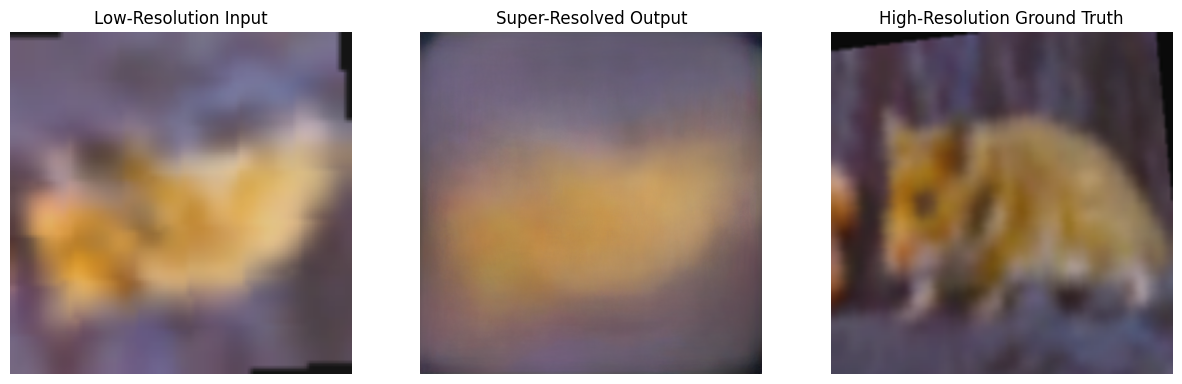

In [17]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from basicsr.archs.rrdbnet_arch import RRDBNet
from matplotlib import pyplot as plt

# Define the custom dataset for .npy files
class SuperResolutionNpyDataset(Dataset):
    def __init__(self, lr_dir, hr_dir):
        self.lr_dir = lr_dir
        self.hr_dir = hr_dir
        self.lr_files = sorted(os.listdir(lr_dir))
        self.hr_files = sorted(os.listdir(hr_dir))

    def __len__(self):
        return len(self.lr_files)

    def __getitem__(self, idx):
        lr_path = os.path.join(self.lr_dir, self.lr_files[idx])
        hr_path = os.path.join(self.hr_dir, self.hr_files[idx])

        # Load normalized .npy arrays
        lr_image = np.load(lr_path)
        hr_image = np.load(hr_path)

        # Convert to PyTorch tensors
        lr_tensor = torch.tensor(lr_image).permute(2, 0, 1).float()  # HWC to CHW
        hr_tensor = torch.tensor(hr_image).permute(2, 0, 1).float()

        return lr_tensor, hr_tensor

# Paths
lr_dir = "/content/super_resolution_dataset/normalized_reduced/val/super_resolution_lr"
hr_dir = "/content/super_resolution_dataset/normalized_reduced/val/super_resolution_hr"
model_path = "/content/drive/MyDrive/best_model_epoch_6.pth"

# Initialize the DataLoader
val_dataset = SuperResolutionNpyDataset(lr_dir, hr_dir)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

# Load the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4).to(device)
model.load_state_dict(torch.load(model_path))
model.eval()

# Evaluation and Visualization
def visualize_results(model, dataloader, device):
    model.eval()
    with torch.no_grad():
        for lr_batch, hr_batch in dataloader:
            lr_batch = lr_batch.to(device)
            sr_batch = model(lr_batch).clamp(-1, 1)  # Ensure output is in normalized range [-1, 1]

            # Denormalize images to [0, 1] for visualization
            lr_batch = (lr_batch + 1) / 2
            sr_batch = (sr_batch + 1) / 2
            hr_batch = (hr_batch + 1) / 2

            # Convert to NumPy arrays
            lr_image = lr_batch[0].permute(1, 2, 0).cpu().numpy()
            sr_image = sr_batch[0].permute(1, 2, 0).cpu().numpy()
            hr_image = hr_batch[0].permute(1, 2, 0).cpu().numpy()

            # Plot the results
            plt.figure(figsize=(15, 5))
            plt.subplot(1, 3, 1)
            plt.imshow(lr_image)
            plt.title("Low-Resolution Input")
            plt.axis("off")

            plt.subplot(1, 3, 2)
            plt.imshow(sr_image)
            plt.title("Super-Resolved Output")
            plt.axis("off")

            plt.subplot(1, 3, 3)
            plt.imshow(hr_image)
            plt.title("High-Resolution Ground Truth")
            plt.axis("off")

            plt.show()

            # Break after visualizing one batch
            break

# Call the function to visualize
visualize_results(model, val_loader, device)


The super-resolved output is not ideal; it lacks clarity and detail. It seems the model is struggling to reconstruct finer features. This might indicate underfitting or that the model is not fully trained. Additionally, the dataset and the scale factor (x4) may challenge the model.